In [1]:
!pip install -q sklearn

In [2]:
%tensorflow_version 2.x
import tensorflow.compat.v2.feature_column as fc
import tensorflow.compat.v1.saved_model as saved_model
import tensorflow as tf

from sklearn.preprocessing import OneHotEncoder

from __future__ import absolute_import, division, print_function, unicode_literals
from IPython.display import clear_output
from six.moves import urllib
from copy import deepcopy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
tf.random.set_seed(197)
print(tf.__version__)

2.5.0


# Data Analysis

**Linear analysis**: For linearly correlated datapoints in $\mathit{R^{n}}$ space

## Loading the data

In [4]:
df_train = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/train.csv")
df_eval = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/eval.csv")

In [5]:
y_train = df_train["survived"]
y_eval = df_eval["survived"]

In [6]:
df_train_bak = deepcopy(df_train)

## Preliminary Descriptive analysis

In [7]:
df_train.head(6)

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y
5,0,male,2.0,3,1,21.0750,Third,unknown,Southampton,n


In [8]:
df_train.describe()

,survived,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000,627.000000
mean,0.387560,29.631308,0.545455,0.379585,34.385399
std,0.487582,12.511818,1.151090,0.792999,54.597730
min,0.000000,0.750000,0.000000,0.000000,0.000000
25%,0.000000,23.000000,0.000000,0.000000,7.895800
50%,0.000000,28.000000,0.000000,0.000000,15.045800
75%,1.000000,35.000000,1.000000,0.000000,31.387500
max,1.000000,80.000000,8.000000,5.000000,512.329200


In [9]:
df_train.describe(include='object')

,sex,class,deck,embark_town,alone
count,627,627,627,627,627
unique,2,3,8,4,2
top,male,Third,unknown,Southampton,y
freq,410,341,481,450,372


In [10]:
df_train.shape

(627, 10)

## Exploratory analysis

In [11]:
unique_survived = [val for val in y_train.unique()]
unique_survived

[0, 1]

### 1 class

#### 1.1 Unique values

In [12]:
unique_class = [val for val in df_train['class'].unique()]
unique_class

['Third', 'First', 'Second']

#### 1.2 Distribution

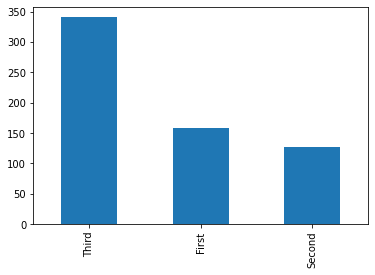

In [13]:
df_train['class'].value_counts().plot(kind = 'bar')

#### 1.3 Stacked survival stats

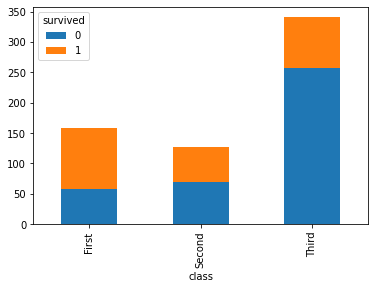

In [14]:
df = pd.DataFrame(df_train.groupby("class")['survived'].value_counts())
df = df.rename(columns={'survived':'count'}).pivot_table(index = 'class', values = 'count', columns = 'survived').reset_index()
df.plot(kind = "bar", stacked = True, x = 'class')

### 2 Alone

#### 2.1 Unique Values

In [15]:
unique_alone = [val for val in df_train['alone'].unique()]
unique_alone

['n', 'y']

#### 2.2 Stacked survival stats

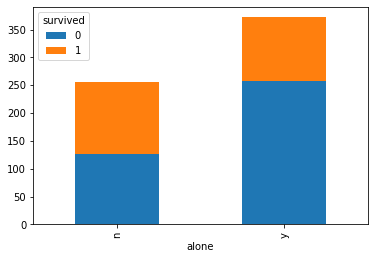

In [16]:
df = pd.DataFrame(df_train.groupby("alone")['survived'].value_counts())
df = df.rename(columns={'survived':'count'}).pivot_table(index = 'alone', values = 'count', columns = 'survived').reset_index()
df.plot(kind = "bar", stacked = True, x = 'alone')

### 3 Sex

#### 3.1 Unique values

In [17]:
unique_sex = [val for val in df_train['sex'].unique()]
unique_sex

['male', 'female']

#### 3.2 Stacked survival stats

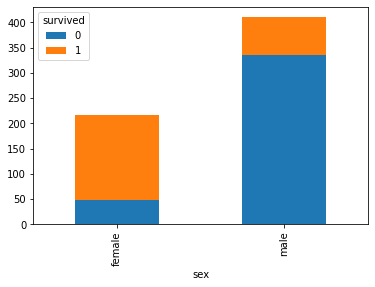

In [18]:
df = pd.DataFrame(df_train.groupby("sex")['survived'].value_counts())
df = df.rename(columns={'survived':'count'}).pivot_table(index = 'sex', values = 'count', columns = 'survived').reset_index()
df.plot(kind = "bar", stacked = True, x = 'sex')

### 4 Embarked Town

#### 4.1 Unique values

In [19]:
unique_embark_town = [val for val in df_train['embark_town'].unique()]
unique_embark_town

['Southampton', 'Cherbourg', 'Queenstown', 'unknown']

#### 4.2 Stacked survival stats

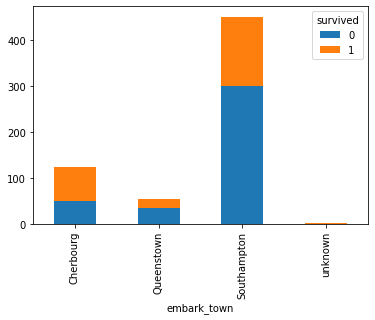

In [20]:
df = pd.DataFrame(df_train.groupby("embark_town")['survived'].value_counts())
df = df.rename(columns={'survived':'count'}).pivot_table(index = 'embark_town', values = 'count', columns = 'survived').reset_index()
df.plot(kind = "bar", stacked = True, x = 'embark_town')

### 5 Deck 

#### 5.1 Stacked survival stats

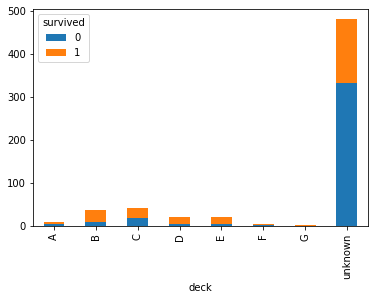

In [21]:
df = pd.DataFrame(df_train.groupby("deck")['survived'].value_counts())
df = df.rename(columns={'survived':'count'}).pivot_table(index = 'deck', values = 'count', columns = 'survived').reset_index()
df.plot(kind = "bar", stacked = True, x = 'deck')

### 6 Parch

#### 6.1 Unique values

In [22]:
unique_parch = [val for val in df_train['parch'].unique()]
unique_parch

[0, 1, 2, 5, 3, 4]

#### 6.2 Stacked survival stats

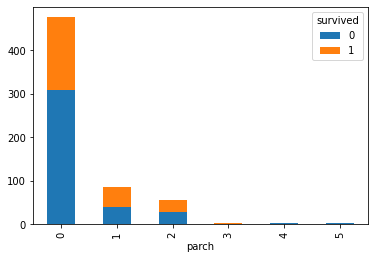

In [23]:
df = pd.DataFrame(df_train.groupby("parch")['survived'].value_counts())
df = df.rename(columns={'survived':'count'}).pivot_table(index = 'parch', values = 'count', columns = 'survived').reset_index()
df.plot(kind = "bar", stacked = True, x = 'parch')

### 7 Fare

#### 7.1 Stacked survival status

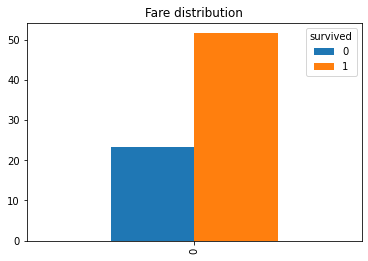

In [24]:
df = pd.DataFrame(df_train.groupby("survived")['fare'].mean())
df = df.rename(columns={'fare':'mean'}).pivot_table(values = 'mean', columns = 'survived').reset_index(drop = True)
df.plot(kind = "bar", stacked = False, title = 'Fare distribution')

### 8 Age

#### 8.1 Distribution 

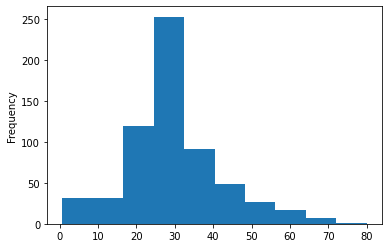

In [25]:
df_train['age'].plot(kind = 'hist')

#### 8.2 Stacked survival stats

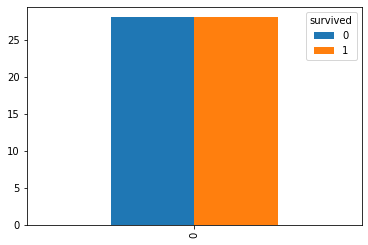

In [26]:
df = pd.DataFrame(df_train.groupby("survived")['age'].median())
df = df.rename(columns={'age':'median'}).pivot_table(values = 'median', columns = 'survived').reset_index(drop = True)
df.plot(kind = "bar", stacked = False)

# Building model

## Preprocessing 

In [27]:
_cols = df_train.columns
_label = y_train.name
_unused = ['deck']
df_train.drop(_unused, axis = 1, inplace=True)
 
num_cols = df_train.select_dtypes(['int64','int32']).columns ## To convert int to float 
cat_cols = df_train.select_dtypes(['object']).columns ## To encode categorical data to numeric

In [28]:
list(cat_cols)+[_label]

['sex', 'class', 'embark_town', 'alone', 'survived']

In [29]:
_cat_types = {
    'sex': pd.api.types.CategoricalDtype(categories=unique_sex),
    'class': pd.api.types.CategoricalDtype(categories=unique_class),
    'embark_town': pd.api.types.CategoricalDtype(categories=unique_embark_town),
    'alone': pd.api.types.CategoricalDtype(categories=unique_alone),
    'survived': pd.api.types.CategoricalDtype(categories=unique_survived)
}

In [30]:
df_train[cat_cols] = df_train[cat_cols].apply(lambda x: x.astype(_cat_types[x.name]))
df_train[cat_cols] = df_train[cat_cols].apply(lambda x: x.cat.codes)

In [31]:
df_train['sex'].astype(_cat_types[df_train['sex'].name]).cat.codes

0     -1
1     -1
2     -1
3     -1
4     -1
      ..
622   -1
623   -1
624   -1
625   -1
626   -1
Length: 627, dtype: int8

## Standardizing data

In [32]:
[x for x in map(str, df_train.dtypes)]

['int64',
 'int8',
 'float64',
 'int64',
 'int64',
 'float64',
 'int8',
 'int8',
 'int8']

In [33]:
df_train.dtypes.index

Index(['survived', 'sex', 'age', 'n_siblings_spouses', 'parch', 'fare',
       'class', 'embark_town', 'alone'],
      dtype='object')

In [34]:
dtypes = list(zip(df_train.dtypes.index, map(str, df_train.dtypes)))

In [35]:
def standardize(dataset):
  dtypes = list(zip(dataset.dtypes.index, map(str, dataset.dtypes)))
  for column, dtype in dtypes:
    if dtype == 'float32':
        dataset[column] -= dataset[column].mean()
        dataset[column] /= dataset[column].std()
  return dataset

## Input function 

In [36]:
def input_fn(features, labels, shuffle = True, num_epochs = 10, batch_size = 32):
    dataset = tf.data.Dataset.from_tensor_slices(inputs)

    if shuffle:
        dataset = dataset.shuffle(buffer_size=len(features))
    dataset = dataset.repeat(num_epochs)
    dataset = dataset.batch(batch_size)
    return dataset

## Helper class

In [37]:
class PreProcessHelper():
  def __init__(self):
    pass

  def create_categorical_type(self, dataframe, dtypes):
    unique_values = []
    _CATEGORICAL_TYPES = {}
    for column, dtype in dtypes:
        if dtype == 'object':
            unique_values = [x for x in dataframe[column].unique()]
            _CATEGORICAL_TYPES[column] = pd.api.types.CategoricalDtype(categories=unique_values)
    return _CATEGORICAL_TYPES

  def removeUnused(self, dataframe, unused):
    if(unused):
      dataframe.drop(unused, axis = 1, inplace=True)
    return dataframe

  def preprocess(self, dataframe, _CATEGORICAL_TYPES, model_type):
    # Convert integer valued (numeric) columns to floating point
    num_cols = dataframe.select_dtypes(['int64']).columns
    dataframe[num_cols] = dataframe[num_cols].astype('float32')

    # Convert categorical columns to numeric
    cat_cols = dataframe.select_dtypes(['object']).columns
    dataframe[cat_cols] = dataframe[cat_cols].apply(lambda x: x.astype(_CATEGORICAL_TYPES[x.name]))

    if(model_type == 'neural'):
      dataframe[cat_cols] = dataframe[cat_cols].apply(lambda x: x.cat.codes)

    return dataframe

  def standardize_data(self, dataframe, dtypes, response, standardize):
    if(standardize):
      dataframe_x = dataframe.drop(response, axis = 1)
      dataframe_y = dataframe[response]
      for column, dtype in dtypes:
          if dtype == 'float32':
              dataframe_x[column] -= dataframe_x[column].mean()
              dataframe_x[column] /= dataframe_x[column].std()
      dataframe = pd.concat([dataframe_x, dataframe_y], axis = 1)
    return dataframe
  
  def split_data(self, dataframe, response):
    train, eval = dataframe.xs('train'), dataframe.xs('eval')
    train_x, train_y = train.drop(response, axis = 1), train[response]
    eval_x, eval_y = eval.drop(response, axis = 1), eval[response]
    return train_x, train_y, eval_x, eval_y
    
  def get_feature_columns(self, train_x, _CATEGORICAL_TYPES):
    feature_column = []
    num_cols = list(train_x.select_dtypes(['float32']).columns)
    for key,value in _CATEGORICAL_TYPES.items():
      unique = train_x[key].unique()
      feature_column.append(tf.feature_column.categorical_column_with_vocabulary_list(key, unique))
    for col in num_cols:
      feature_column.append(tf.feature_column.numeric_column(col, dtype=tf.dtypes.float32))
    return feature_column

## Linear Classifier model class

In [38]:
df_train = deepcopy(df_train_bak)

In [39]:
class TitanicSurvival_Estimator(PreProcessHelper):
  def __init__(self, df_train, df_eval, response, unused = [], standardize = False, model_type = 'estimator'):
    self.df_train = deepcopy(df_train)
    self.df_eval = deepcopy(df_eval)
    self.unused = unused 
    self.response = response
    self.standardize = standardize
    self.model_type = model_type

    self.dataframe = pd.concat([self.df_train, self.df_eval], keys=['train', 'eval'])
    # Remove unused columns
    self.dataframe = self.removeUnused(self.dataframe, self.unused)

    self.dtypes = list(zip(self.dataframe.dtypes.index, map(str, self.dataframe.dtypes)))


    self._CATEGORICAL_TYPES = self.create_categorical_type(self.dataframe, self.dtypes)

    self.dataframe = self.preprocess(self.dataframe, self._CATEGORICAL_TYPES, self.model_type)
    self.dataframe = self.standardize_data(self.dataframe, self.dtypes, self.response, self.standardize)


    ## Train eval split on input-response
    self.train_x, self.train_y, self.eval_x, self.eval_y = self.split_data(self.dataframe, self.response)

    self.feature_column = self.get_feature_columns(self.train_x, self._CATEGORICAL_TYPES)
  
  def make_input_fn(self, features, labels, shuffle = True, num_epochs = 10, batch_size = 32):
    def input_fn():
      dataset = tf.data.Dataset.from_tensor_slices((dict(features),labels))
      if shuffle:
          dataset = dataset.shuffle(buffer_size=len(features))
      dataset = dataset.repeat(num_epochs)
      dataset = dataset.batch(batch_size)
      return dataset
    return input_fn

  def train_model(self, train_x = None, train_y = None):
    if(train_x == None):
      train_x = deepcopy(self.train_x)
    if(train_y == None):
      train_y = deepcopy(self.train_y)
    ## Train input function
    train_input_fn = self.make_input_fn(train_x, train_y)
    
    self.lreg = tf.estimator.LinearClassifier(self.feature_column, n_classes=2)
    self.lreg.train(train_input_fn)
    clear_output()
    return(self.lreg)

  def evaluate_model(self, eval_x = None, eval_y = None, lreg = None):
    if(eval_x == None):
      eval_x = deepcopy(self.eval_x)
    if(eval_y == None):
      eval_y = deepcopy(self.eval_y)
    if(lreg == None):
      lreg = deepcopy(self.lreg)
    eval_input_fn = self.make_input_fn(eval_x, eval_y, num_epochs=1, shuffle=False)
    res = lreg.evaluate(eval_input_fn)
    clear_output()
    return res

# Model training and evaluation

In [40]:
modelClass = TitanicSurvival_Estimator(df_train=df_train, df_eval=df_eval, response='survived', unused='deck')

In [41]:
model = modelClass.train_model()

In [42]:
modelClass.evaluate_model()

{'accuracy': 0.7651515,
 'accuracy_baseline': 0.625,
 'auc': 0.8142639,
 'auc_precision_recall': 0.78807926,
 'average_loss': 0.4992237,
 'global_step': 196,
 'label/mean': 0.375,
 'loss': 0.48517534,
 'precision': 0.7032967,
 'prediction/mean': 0.3935935,
 'recall': 0.64646465}